Fashion mnist - CNN

In [ ]:
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import image


데이터 불러오기

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [ ]:
fashion = load_data()

Train, test 분리

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

One hot encoding

In [ ]:
y_trainONE = to_categorical(y_train)
y_testONE = to_categorical(y_test)

CNN modeling

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1), # fashion mnist data --> greyscale
                 activation='relu', padding='same')) # default padding - None (valid) --> True (same)
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2))) #가장 큰 값 출력?
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #마지막은 분류갯수
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_trainONE, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.6169 - acc: 0.8562
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2728 - acc: 0.9004
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2245 - acc: 0.9159
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1876 - acc: 0.9294
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1636 - acc: 0.9375
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1387 - acc: 0.9483
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1215 - acc: 0.9546
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1028 - acc: 0.9623
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0949 - acc: 0.9658
Epoch 10/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0827 - acc: 0.9707


Confusion maxtrix

In [ ]:
CM_train = confusion_matrix(y_train, model.predict( x_train.reshape(-1,28,28)).argmax(axis=1))

In [ ]:
CM_test = confusion_matrix(y_test, model.predict(x_test.reshape(-1,28,28)).argmax(axis=1))

Text(33.0, 0.5, 'Real')

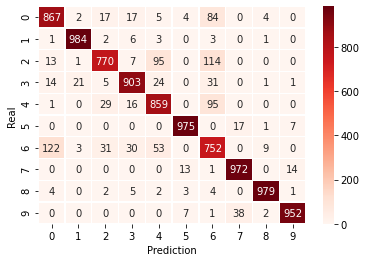

In [ ]:
sns.heatmap(CM_test,
            annot=True,
            cmap='Reds',
            fmt = 'd',
            linewidths=0.25
           )
plt.xlabel('Prediction')
plt.ylabel('Real')